In [12]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle
from IPython.display import Audio
import librosa
import librosa.feature
sr=48000


In [9]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params=[]
stack_num=np.random.choice([2])
for i in range(stack_num): 
    p=pg.RandomParams()
#     print(vars(p))
#     print(p.getStart())
    s=pg.Synth(p)
    out.dub(s.buff,p.getStart())
    params.append(p)
out=fx.norm(out,1)

# z=librosa.feature.rms(hp.memToAud(out))

# print(np.sum(z),hp.memToAud(out).shape)
# hp.specShow(out)
Audio(hp.memToAud(out),rate=sr, autoplay=True)


CPU times: user 20.6 ms, sys: 0 ns, total: 20.6 ms
Wall time: 20 ms


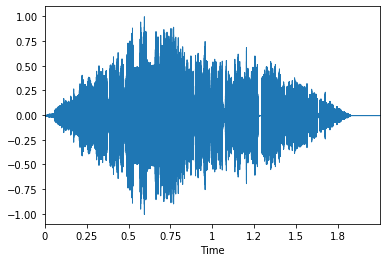

In [10]:
import librosa
librosa.display.waveplot(hp.memToAud(out))

In [11]:
%%time
#generate a lot of sounds
import imp
imp.reload(pg)
imp.reload(hp)

for j in range(14000):
    out = dsp.buffer(length=1,channels=1)
    params=[]
    stack_num=np.random.choice([1,2,4,6,8,12,16])
    for i in range(stack_num): 
        p=pg.RandomParams()
    #     print(vars(p))
    #     print(p.getStart())
        s=pg.Synth(p)
        out.dub(s.buff,p.getStart())
        params.append(p)
    out=fx.norm(out,1)  
    if hp.memToAud(out).shape[0]<sr:
#         print(hp.memToAud(out).shape[0])
        out.write("./feature_extraction/drum_dbs/dk_data/synth_noise/%s-%d-%d.wav"%(hp.string_generator(),j,stack_num,))
#     with open("generations/pickles/%d.pkl"%j, 'wb') as pfile:
#         pickle.dump(params,pfile,-1)
    

RuntimeError: Error opening './feature_extraction/drum_dbs/dk_data/synth_noise/WRIC-0-4.wav': System error.

In [7]:
### test to see if pickle works
with open("generations/5_stack/pickles/1.pkl", 'rb') as pfile:
    params=pickle.load(pfile)
out = dsp.buffer(length=1,channels=1)
for p in params: 
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
out=fx.norm(out,1)  
sd.play(out,blocking=True)

###actual sound
import librosa as lb
y,sr=lb.core.load("generations/5_stack/sounds/1.wav")
sd.play(y,samplerate=sr)

FileNotFoundError: [Errno 2] No such file or directory: 'generations/5_stack/pickles/1.pkl'